In [1]:
import pandas as pd
import numpy as np

In [2]:
#Normaliztion 
def Normaliztion(x):
    X_normal = x
    M = np.zeros((1,2))
    S = np.zeros((1,2))
    #convert the x features into numpy matrix
    newx = np.matrix(x)
    # find the mean and the standard diviation of the features
    X_normal =  np.divide(np.subtract(x , newx.mean(0)), newx.std(0))
    return X_normal , M , S

In [3]:
Dataset =  pd.read_csv('OnlineNewsPopularity/OnlineNewsPopularity.csv')

m , n = Dataset.shape
X = Dataset.iloc[:,2:-1]
Y = Dataset.iloc[:,[n-1]]
Y_len = len(Y) 

# initialize the mean and std matrix
mean = np.zeros((1,n))
std  = np.zeros((1,n))

#call the method Normaliztion and gets the new dependent features
X, mean, std = Normaliztion(X)

# add one's column in the features
X = np.hstack((np.ones((Y_len,1)),X))


In [4]:
#Computer the Cost Function
def ComputeCostFunction(x, y, theta):
    m = len(y)
    cost = 0
    error = 0
    i = 0
    while(i < m):
        error = error + np.power(np.matmul(np.transpose(theta),np.transpose(x[i]))-y.iloc[[i],:],2)
        i = i + 1
    return error / (2*m)

In [5]:
def Gradient_Descent(X,Y,theta,alpha,iterations):
        m = len(Y)
        cost_history = np.zeros((iterations,1))
        index = 0
        while(index<iterations):
            theta = np.subtract(theta , np.multiply((alpha/m),np.matmul(np.transpose(X),np.subtract(np.matmul(X,theta), Y))))
            cost_history[index] = ComputeCostFunction(X,Y,theta)
            index = index+1
        return theta , cost_history

In [6]:
#set alpha's value
alpha = 0.01
#set number of iterations 
iterations = 200
#initialize theta and cost function
theta = np.zeros((X.shape[1],1))
cost_function = np.zeros((iterations,1))

# run Gradient Descent 
theta , cost_function = Gradient_Descent(X,Y,theta,alpha,iterations)


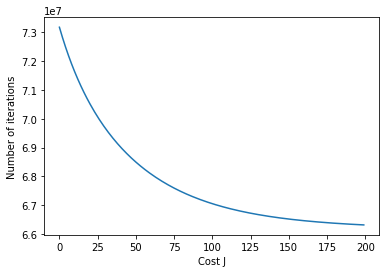

In [8]:
import matplotlib.pyplot as plt
# Plot Cost Function 
plt.plot(cost_function)
plt.ylabel('Number of iterations')
plt.xlabel('Cost J')
plt.show()